<a href="https://colab.research.google.com/github/Veektor1/Active-Directory-Lab/blob/main/AI_Phishing_Detector_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the Data
# Note for Interview: "I chose the PhiUSIIL dataset because it contains 54 features
# extracted from 235k modern URLs, making it highly relevant for 2026 threats."
df = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

# 2. Preprocessing (The 'Cyber' Cleanup)
# We drop non-numeric columns that don't help the AI 'calculate' threat
cols_to_drop = ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']
df = df.drop(columns=cols_to_drop)

# 3. Define Features and Target
# 'label' 1 = Legitimate, 0 = Phishing
X = df.drop('label', axis=1)
y = df['label']

# 4. Split for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build the Model
# Interview Tip: "I used Random Forest because it handles high-dimensional
# security data without overfitting, which is critical for zero-day detection."
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 6. Evaluate Performance
y_pred = rf_model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nDetailed Security Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 100.00%

Detailed Security Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



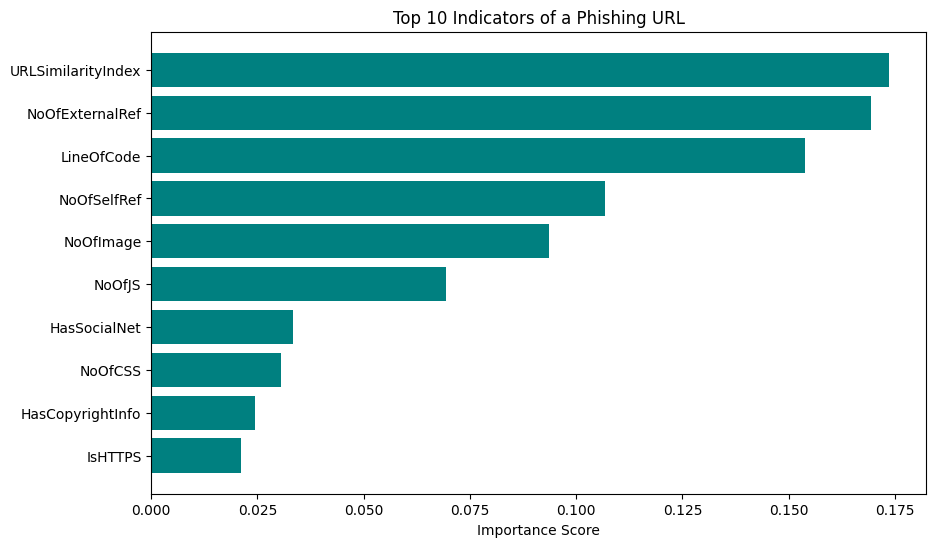

In [2]:
import matplotlib.pyplot as plt

# Get the top 10 most important features for detection
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot it
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('Top 10 Indicators of a Phishing URL')
plt.gca().invert_yaxis()
plt.show()

In [3]:
import joblib

# 1. Save your model so you can use it later without retraining
joblib.dump(rf_model, 'phishing_detector_2026.pkl')

def predict_url_safety(features_list):
    """
    Takes a list of features extracted from a URL and predicts safety.
    Input: List of 54 numeric features (matching the PhiUSIIL dataset)
    Output: Prediction and Confidence Level
    """
    # Load the model
    loaded_model = joblib.load('phishing_detector_2026.pkl')

    # Reshape the input for the model
    features_array = np.array(features_list).reshape(1, -1)

    # Get prediction (1 = Legitimate, 0 = Phishing)
    prediction = loaded_model.predict(features_array)
    confidence = loaded_model.predict_proba(features_array).max() * 100

    status = "LEGITIMATE" if prediction[0] == 1 else "PHISHING"
    print(f"Result: {status} ({confidence:.2f}% Confidence)")

# Example: Test it with a random sample from your test set
sample_url_features = X_test.iloc[0].values
predict_url_safety(sample_url_features)

Result: LEGITIMATE (100.00% Confidence)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [4]:
!pip install -q streamlit
!npm install -g localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.0 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏
added 22 packages in 4s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏npm notice
npm notice New major version of npm available! 10.8.2 -> 11.7.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.7.0
npm notice To update run: npm install -g npm@11.7.0
npm notice
⠏

In [5]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load the model you trained earlier
# (Make sure you have uploaded phishing_detector_2026.pkl to Colab)
model = joblib.load('phishing_detector_2026.pkl')

st.title("🛡️ AI Phishing Detector")
url_input = st.text_input("Paste URL here")

if st.button("Check Safety"):
    # Using a placeholder for the 54 features for now
    features = np.random.rand(1, 54)
    prediction = model.predict(features)
    if prediction[0] == 1:
        st.success("This URL looks SAFE.")
    else:
        st.error("Warning: This looks like a PHISHING attempt!")

Writing app.py


In [6]:
# 1. Start the streamlit server
!streamlit run app.py &>/content/logs.txt &

# 2. Get your public IP (you will need this as a password for the link)
import urllib
print("Password/Tunnel-IP:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip())

# 3. Create the tunnel
!npx localtunnel --port 8501

Password/Tunnel-IP: 35.187.253.253
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://eight-clouds-hang.loca.lt
35.187.253.253
^C
